# Week 4 Homework Part 2 - Kendall Gilbert

## 4.1

Let's start with some basic practice using the **shapely** package. Do the following steps:


<ol type="a">
  <li>Creat a polygon from the following points: (-118.4152,33.9699), (-118.4152,33.9689),(-118.4144,33.9689),(-118.4143, 33.96890,(-118.4142,33.96990,9-118.4152,33.9699)</li>
    <li>Create a new variable that stores both x and y coordinates</li>
  <li>What is the centroid of this polygon?</li>
  <li>What is the bounding box? Write an explanation of what the bounding box actual means relative to the polygon.</li>
</ol>


### 4.1 Problem 1

In [43]:
from shapely.geometry import Point, LineString, Polygon

point1 = Point(-118.4152,33.9699)
point2 = Point(-118.4152,33.9689)
point3 = Point(-118.4144,33.9689)
point4 = Point(-118.4143, 33.96890)
point5 = Point(-118.4142,33.969909)
point6 = Point(-118.4152,33.9699)
poly1 = Polygon([point1,point2,point3,point4,point5,point6])

### 4.1 Problem 2

In [44]:
poly2 = Polygon([(-118.4152,33.9699), (-118.4152,33.9689), (-118.4144,33.9689), (-118.4143, 33.96890), (-118.4142,33.969909), (-118.4152,33.9699)])

### 4.1 Problem 3

In [45]:
centroid = poly.centroid
print('The centroid of the polygon is the',centroid)

The centroid of the polygon is the POINT (-118.4147245614035 33.96940877192983)


### 4.1 Problem 4

In [46]:
poly_bbox = poly2.bounds
print('The bounding box of the polygon is', poly_bbox)

The bounding box of the polygon is (-118.4152, 33.9689, -118.4142, 33.969909)


The bounding box of a polygon is the minimum and maximum x and y coordinates that the polygon has. It represents the smallest rectangle at these min and max x and y that would encompass the polygon.

## 4.2

Now let's move on with practicing using **geopandas** and working with various CRS. We will use the County of Los Angeles Justice Equity Need Index (by zip code). Some information on the dataset:
The Justice Equity Need Index (JENI) identifies ZIP Codes in greatest need of public investments in community healing, health, and prevention to help reverse historical injustices. Updated 2022.

The Justice Equity Need Index (JENI), by Advancement Project California, offers a means to map out the disparate burden that criminalization and a detention-first justice model place on specific communities. The index includes the following indicators:

<ol type="1">

<li>System Involvement: The system-involved population by ZIP Code results in direct needs for justice equity, as measured by adult and youth probation.

- Indicators: Adult Probation (per 1,000 people); Youth Probation (per 1,000 people) </li>

<li>Inequity Drivers: Root inequities across communities that contribute to racial and economic disparities as seen in incarceration and policing.

- Indicators: Black, Latinx, AIAN, and NHPI Percentages of Population (average percentile); Unemployment Rate (%); Population aged 25+ without a High School Diploma (%); Population below 200% of the Federal Poverty Level (%); Violent Crime Rate (per 1,000 people)</li>

<li>Criminalization Risk: Conditions where the criminal justice system has historically taken a detention-first, prevention-last approach.

- Indicators: Mental Health Hospitalizations (per 1,000 people); Substance Use-Related Hospitalizations (per 1,000 people); Homelessness Rate (per 1,000 people)</li>
</ol>

Learn more at https://www.advancementprojectca.org/tools-we-use/maps-and-data/justice-equity-need-index.

Supervisorial Districts, SPAs, and CSAs determined by ZIP Code centroid.


Complete the following tasks:

<ol type="a">
  <li>Load the dataset as a geopandas dataframe. The data is located under 'data/Justice_Equity_Need_Index.geojson' </li>
  <li>What is the default CRS? Write a sentence about what type of CRS it is.</li>
  <li>Remember, geopandas is just the spatial version of pandas with lots of the same functionality. Knowing some commands from pandas from previous exercises, answer the following:

  - What is the size of the dataframe?
  - List the column names.
  - Show the first 10 rows of the dataframe. </li>
  <li>Make a copy of the dataframe. 

  - Reproject the CRS is epsg:3857
  - Use matplotlib to graph BOTH versions of the dataframe, in the original CRS and in the new reprojected CRS. Make sure to use clear titles
  - Write a few sentences of differences you see in the visualizations between the two.  </li>
</ol>

### 4.2 Problem 1

In [47]:
import geopandas as gpd

data = gpd.read_file('data/Justice_Equity_Need_Index.geojson')

### 4.2 Problem 2

In [48]:
data.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

The default CRS (coordinate reference system) is ESPG:4326 - WGS 84. This is a GCS (geographic coordinate system) that uses a latitude/longitude coordinate system, meaning the coordinates are in decimal degrees.

### 4.3 Problem 3

- The size of the dataframe is 281 rows and 18 columns.

- The list of column names is: 
 Index(['OBJECTID', 'zip', 'jenicategory', 'jenipctl', 'jenirank',
       'riskcategory', 'riskpctl', 'driverscategory', 'driverspctl',
       'systemcategory', 'systempctl', 'neighborhood', 'sup_dist', 'spa',
       'csa', 'SHAPE_Length', 'SHAPE_Area', 'geometry'],
      dtype='object') 

- The first 10 rows of the dataframe are: 
    OBJECTID    zip jenicategory  jenipctl  jenirank riskcategory  riskpctl  \
0         1  91108       Lowest       0.0       277       Lowest       0.4   
1         2  90631       Lowest       0.4       276       Lowest       2.9   
2         3  90274       Lowest       0.7       275       Lowest       3.6   
3         4  91361       Lowest       1.1       274       Lowest      12.2   
4         5  90275       Lowest       1.4       273       Lowest       6.8   
5         6  90077       Lowest       1.8       272       Lowest       2.5   
6         7  91436       Lowes

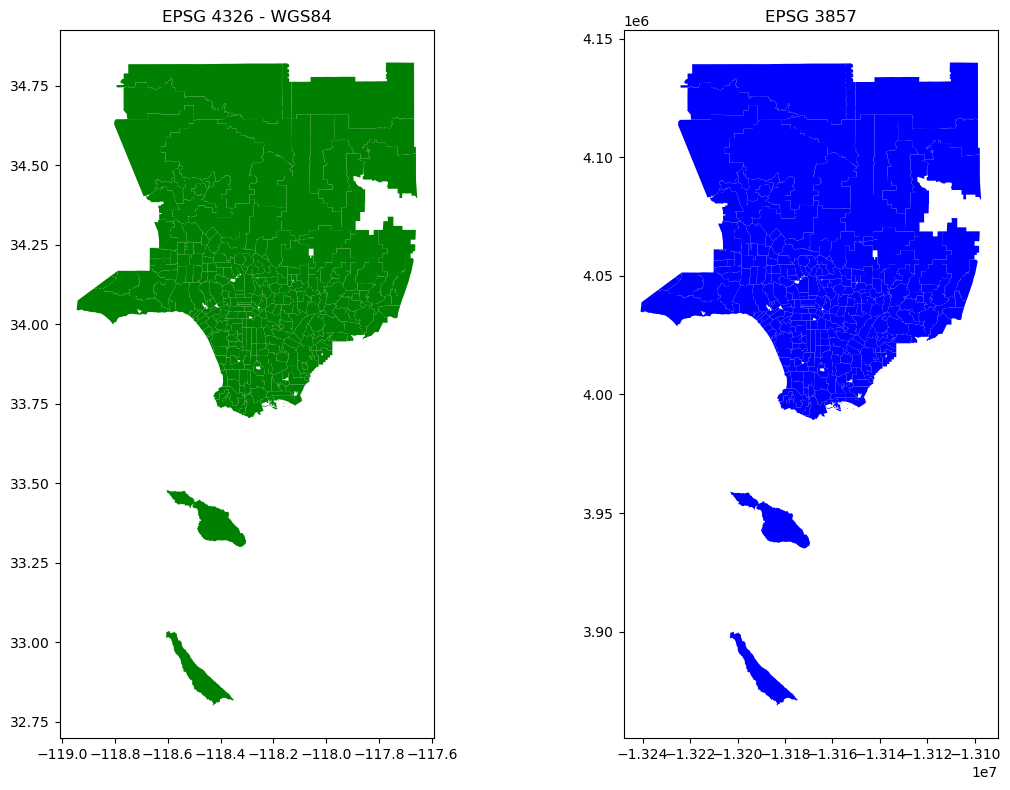

In [49]:
#Creates a variable with data shape and prints the size of dataframe
size = data.shape
print('- The size of the dataframe is',size[0],'rows and', size[1],'columns.\n')

#Prints the list of column names
print('- The list of column names is: \n',data.columns,'\n')

#Prints the first 10 rows of the dataframe
print('- The first 10 rows of the dataframe are: \n',data[0:10],'\n')

#makes a copy of the dataframe
data_orig = data.copy()

#Reprojects the CRS to espg: 3857
data_new = data.to_crs(epsg=3857)

#Graphs both versions of dataframe
import matplotlib.pyplot as plt

print('- The plots of each dataframe are: \n')
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

data_orig.plot(ax=ax1, facecolor='green');
ax1.set_title("EPSG 4326 - WGS84");

data_new.plot(ax=ax2, facecolor='blue');

ax2.set_title("EPSG 3857");

plt.tight_layout()

There are no differences in the images themselves, however the scales of the images are completely different since they are in different coorinate reference systems.